In [1]:
import pandas as pd
from mlflow.tracking import MlflowClient
import numpy as np

from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
from src.database.mlflow import MLFlowClient
from src.database.mlflow import MLFlowClient
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

/Users/ilijanaspasojevic/PycharmProjects/dmbal/src/data_analysis/analysis_helpers.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
runs_bp_smo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["bp_smo_canceled", "margin", "w_kmeans",10, 30, 0.01, "Adam",10])
print(len(runs_bp_smo))
#all_run_ids_smo = get_run_ids(runs_bp_smo)
run_ids_smo = get_run_ids(runs_bp_smo.head(5))
#nochmal mit tail ausgeben und schauen, ob es einen großen Unterschied macht

10


In [3]:
runs_bp_lmo = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.beta"],[True, True, True, True, True, True],["bp_lmo_canceled", "margin", "w_kmeans", 30, 0.01, 10])
print(len(runs_bp_lmo))
#run_ids_bp_lmo = get_run_ids(runs_bp_lmo)
run_ids_bp_lmo = get_run_ids(runs_bp_lmo.head(5))
run_ids_bp_lmo

10


0    23f35ec997b246ed83e35e0ec48449f0
1    90b5a81e660149f980b4cdf856c9f1d2
2    ecb6034747874688b5f782e160bc0a08
3    5ee75b7f101942acb2c777ca1002193a
4    67e3f8c2cba84b33ab277e5d9db777f7
Name: run_id, dtype: object

In [4]:
runs_centroids = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.optimizer", "params.beta"],[True, True, True, True, True, True, True, True],["centroids", "margin", "w_kmeans",1000, 30, 0.01, "Adam", 10])
print(len(runs_centroids))
#run_ids_centroids = get_run_ids(runs_centroids)
run_ids_centroids = get_run_ids(runs_centroids.head(5))
run_ids_centroids

10


0    7030097050d94bb0ad8288f25ea843ef
1    06abfb1e7b5144c09b93e3bc1e49e3ac
2    f24fd5b0be31420593f78ab1d3c605bd
3    730a9cd1a2934c8bb2ede6240a515b4f
4    18a912a4411e40d4bf057a51f6217790
Name: run_id, dtype: object

In [5]:
runs_bp_clusterwise = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k","params.max_epochs", "params.learning_rate", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["bp_prop_clustersize", "margin", "w_kmeans",1000, 30, 0.01, 10, 10])
print(len(runs_bp_clusterwise))
#run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise)
run_ids_bp_clusterwise = get_run_ids(runs_bp_clusterwise.head(5))
run_ids_bp_clusterwise

10


0    ed84fe4bbe844ce1ad2ddacdfea4a0b2
1    5d91c2b465e74d2faab1d98655a9636e
2    448918e9a1ea4e8c82eb3c52e0f7db2f
3    22d8f8d1efb3415cb80b141364a34536
4    6a72301736c643549bf5cc7f21e5f8f1
Name: run_id, dtype: object

In [6]:
runs_boundary = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.k", "params.learning_rate", "params.max_epochs", "params.number_clusters", "params.beta"],[True, True, True, True, True, True, True, True],["boundary_points", "margin", "w_kmeans",1000, 0.01, 30, 10, 10])
print(len(runs_boundary))
#run_ids_boundary = get_run_ids(runs_boundary)
run_ids_boundary = get_run_ids(runs_boundary.head(5))
run_ids_boundary

10


0    42939bd9aea04d528f23d046992ea338
1    c4eeaa5e0b834a5591422280e69ef8c7
2    f3efbb7386054dc69ba14b7e7081f03d
3    199dcc95d8e0459d88737f5809c7539c
4    97277ea2c2a14c71a77bcfb7eab5d164
Name: run_id, dtype: object

In [7]:
runs_random = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size"],[True, True, True, True],["random", 0.01, 30, 1000])
print(len(runs_random))
#run_ids_random = get_run_ids(runs_random)
run_ids_random = get_run_ids(runs_random.head(5))
run_ids_random

10


0    7f1e5628b6334cc3a9de37e61104358d
1    421ff61556e5461f97a973fa111c3c63
2    ae5681ec87874fbda5bd998ad8c13970
3    1437f6a0f73a4039ad88d8c63b54f84c
4    d2a0054c9b594e3cb78e9adb27ac6157
Name: run_id, dtype: object

In [8]:
runs_random_uncertainty = db.get_entries(['params.diversity_strategy', "params.learning_rate", "params.max_epochs", "params.sampling_size", "params.beta", "params.uncertainty"],[True, True, True, True, True, True],["random_uncertainty", 0.01, 30, 1000, 10, "margin"])
print(len(runs_random_uncertainty))
#run_ids_random = get_run_ids(runs_random)
run_ids_random_uncertainty = get_run_ids(runs_random_uncertainty.head(5))
run_ids_random_uncertainty

10


0    865538aa565646b3b6a649ea376b56b9
1    6690062a6045491c8715d62e609b4ae6
2    dbe4915b08e34a8d8d24f3ae79ff434f
3    14b950db6017423aa76868e657952404
4    d87aa8aaa6264b2b9f74a8a884f6e2e3
Name: run_id, dtype: object

In [9]:
samples_labeled_bp_smo, avg_accs_bp_smo = get_labeledSamples_avgAcc(run_ids_smo, tracking)
samples_labeled_bp_lmo, avg_accs_bp_lmo = get_labeledSamples_avgAcc(run_ids_bp_lmo, tracking)
samples_labeled_centroids, avg_accs_centroids = get_labeledSamples_avgAcc(run_ids_centroids, tracking)
samples_labeled_clusterwise, avg_accs_clusterwise = get_labeledSamples_avgAcc(run_ids_bp_clusterwise, tracking)
samples_labeled_boundary, avg_accs_boundary = get_labeledSamples_avgAcc(run_ids_boundary, tracking)
samples_labeled_random, avg_accs_random = get_labeledSamples_avgAcc(run_ids_random, tracking)
samples_labeled_random_uncertain, avg_accs_random_uncertain = get_labeledSamples_avgAcc(run_ids_random_uncertainty, tracking)

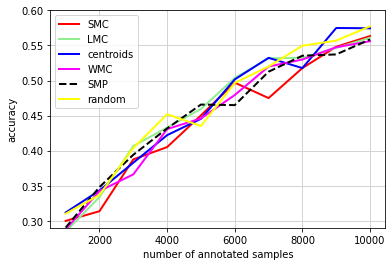

In [10]:
# plot
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='red', label='SMC', linewidth=2)
plt.plot(samples_labeled_bp_lmo, avg_accs_bp_lmo,color='lightgreen', label='LMC', linewidth=2)
plt.plot(samples_labeled_centroids, avg_accs_centroids,color='blue', label='centroids', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='WMC', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='SMP', linestyle='--',linewidth=2)
plt.plot(samples_labeled_random, avg_accs_random,color='yellow', label='random',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.60])

plt.show()

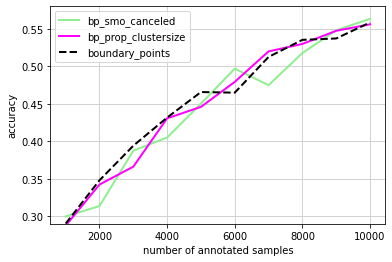

In [11]:
plt.plot(samples_labeled_bp_smo, avg_accs_bp_smo,color='lightgreen', label='bp_smo_canceled', linewidth=2)
plt.plot(samples_labeled_clusterwise, avg_accs_clusterwise,color='magenta', label='bp_prop_clustersize', linewidth=2)
plt.plot(samples_labeled_boundary, avg_accs_boundary,color='black', label='boundary_points', linestyle='--',linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [12]:
print(f'bp_smo: {avg_accs_bp_smo}')
print(f'bp_lmo: {avg_accs_bp_lmo}')

bp_smo: [0.29986 0.31366 0.38752 0.40506 0.45026 0.49692 0.47494 0.51774 0.5481
 0.56336]
bp_lmo: [0.28454 0.33386 0.4065  0.43294 0.45942 0.50358 0.5316  0.53256 0.54638
 0.56092]


In [13]:
avg_accs_centroids

array([0.31178, 0.34324, 0.38276, 0.4221 , 0.44536, 0.50156, 0.5323 ,
       0.51772, 0.57486, 0.57446])

In [14]:
avg_accs_boundary

array([0.29026, 0.34802, 0.39412, 0.43168, 0.46572, 0.4649 , 0.51256,
       0.53534, 0.53718, 0.55854])

In [15]:
avg_accs_bp_smo

array([0.29986, 0.31366, 0.38752, 0.40506, 0.45026, 0.49692, 0.47494,
       0.51774, 0.5481 , 0.56336])

In [16]:
avg_accs_bp_lmo

array([0.28454, 0.33386, 0.4065 , 0.43294, 0.45942, 0.50358, 0.5316 ,
       0.53256, 0.54638, 0.56092])

In [17]:
avg_accs_clusterwise

array([0.28752, 0.34238, 0.36618, 0.4307 , 0.4459 , 0.4793 , 0.51992,
       0.5299 , 0.54742, 0.55604])

In [18]:
avg_accs_random

array([0.31016, 0.33688, 0.40374, 0.45186, 0.43506, 0.49656, 0.51994,
       0.54958, 0.55688, 0.57726])

In [19]:
avg_accs_random_uncertain

array([0.29734, 0.3401 , 0.39482, 0.42034, 0.46066, 0.48952, 0.52332,
       0.51436, 0.50816, 0.58952])